PoC - Proof of Concept

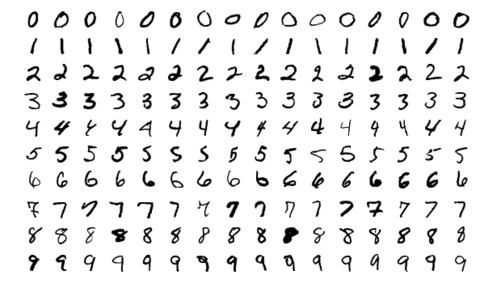

### Colab Link
#### https://colab.research.google.com/drive/15BZvC7uZ7AHjnt00nDveDaBQzkycLDhy#scrollTo=mZ2JNV0u4g8y

#MNIST Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full[0].shape

(28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
y_train_full[0]

5

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

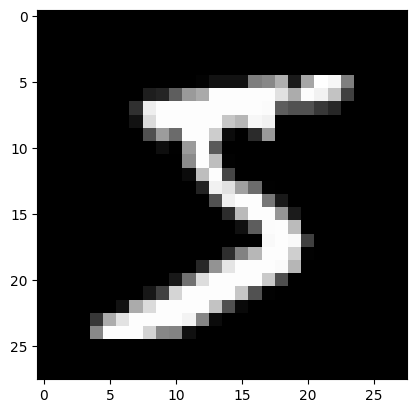

In [12]:
plt.imshow(img, cmap="gray")

In [13]:
label = y_train_full[0]
label

5

<Axes: >

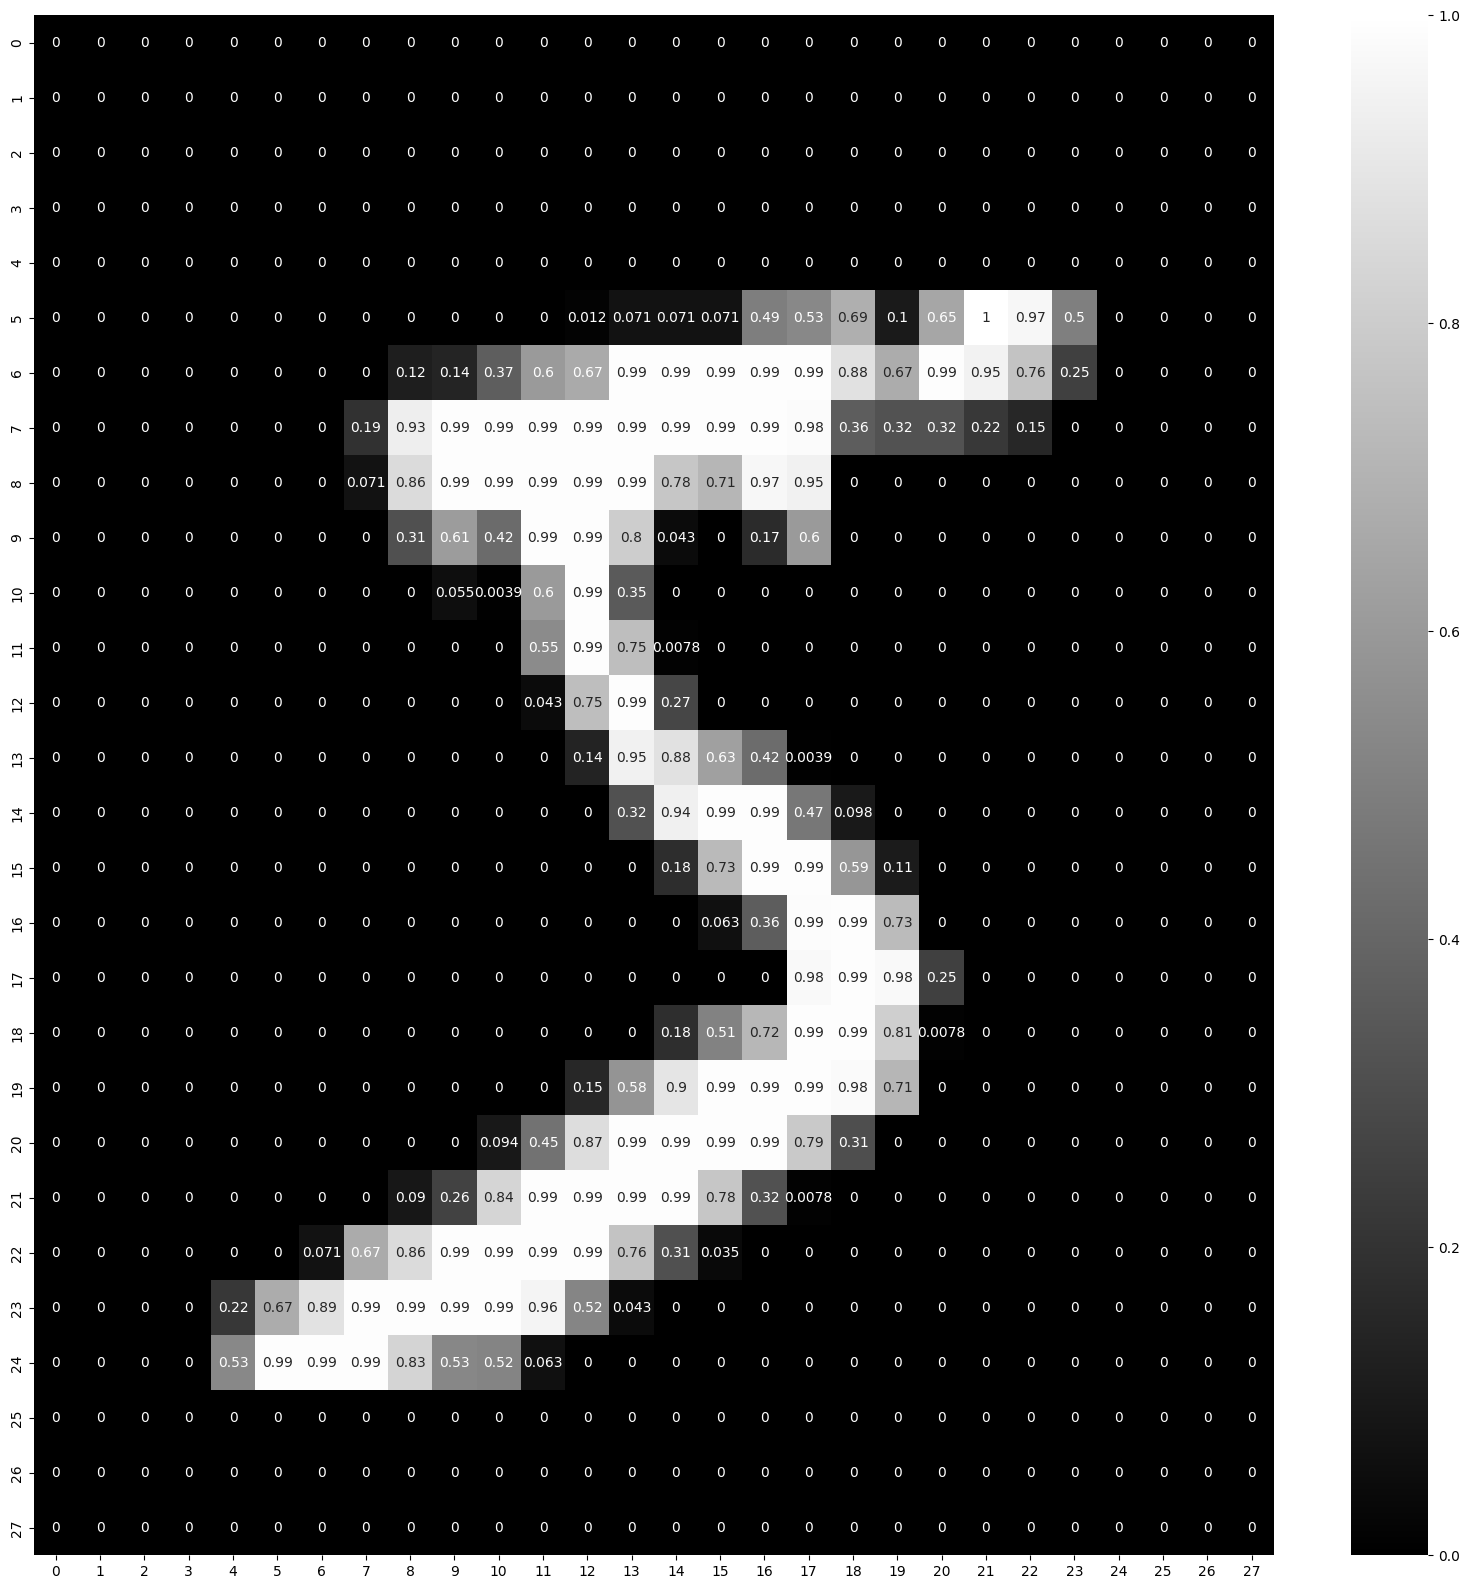

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [15]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [16]:
1.5e+2

150.0

In [17]:
1.5 * 10 ** 2

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [18]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
len(np.unique(y_train))

10

In [21]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [22]:
# Note : Here we are creating ANN model
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

In [23]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Parameters = weights + biases
784*300 + 300

235500

In [26]:
# Parameters = weights + biases
300*100 + 100

30100

In [27]:
# Parameters = weights + biases
100 * 10 + 10

1010

In [28]:
# Parameters = weights + biases
235500 + 30100 + 1010

266610

In [29]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [30]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.6232 - accuracy: 0.8375 - val_loss: 0.3039 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2894 - accuracy: 0.9178 - val_loss: 0.2382 - val_accuracy: 0.9368
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2365 - accuracy: 0.9327 - val_loss: 0.2028 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2016 - accuracy: 0.9423 - val_loss: 0.1775 - val_accuracy: 0.9514
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1756 - accuracy: 0.9496 - val_loss: 0.1576 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1549 - accuracy: 0.9553 - val_loss: 0.1459 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1385 - accuracy: 0.9598 - val_loss: 0.1308 - val_accuracy

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.623183,0.837455,0.303924,0.9162
1,0.289377,0.917836,0.238195,0.9368
2,0.236461,0.932727,0.202793,0.9436
3,0.201628,0.942255,0.177522,0.9514
4,0.175599,0.949600,0.157592,0.9578
5,0.154908,0.955291,0.145927,0.9620
6,0.138455,0.959800,0.130811,0.9658
7,0.124302,0.965109,0.121481,0.9672
8,0.112934,0.967382,0.115235,0.9696
9,0.102625,0.971255,0.106787,0.9720


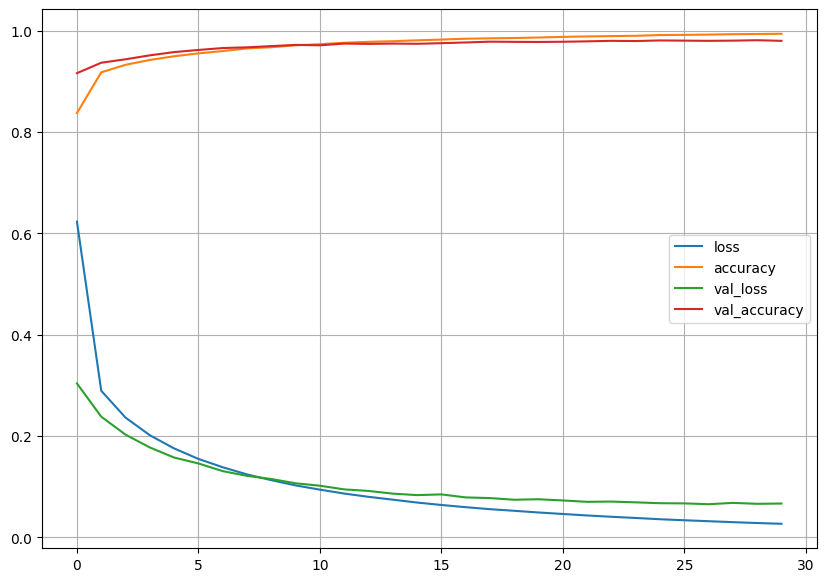

In [32]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [33]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9784


[0.06812862306833267, 0.9783999919891357]

In [34]:
10000/32

312.5

In [35]:
model_clf.save("mnist_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 78ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [37]:
X_new.shape

(3, 28, 28)

In [38]:
X_new[0].shape

(28, 28)

In [39]:
y_prob.shape

(3, 10)

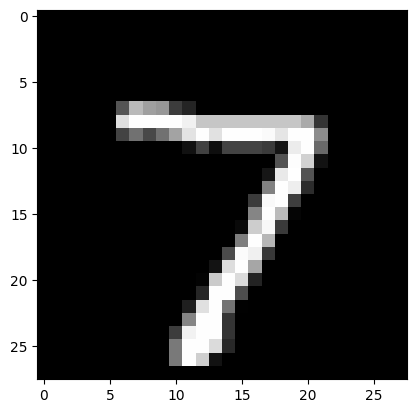

In [40]:
plt.imshow(X_new[0], cmap="gray")

In [41]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

In [42]:
for kohli, dhoni, dravid in zip([1,2,3], [3,2,1], [3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


In [43]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

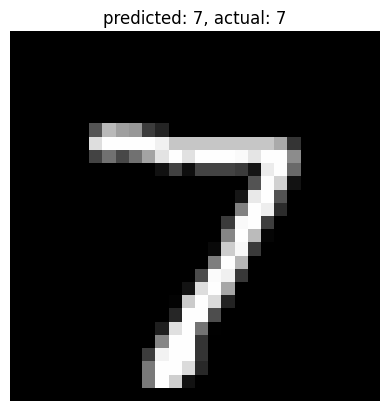

------------------------------------------------------------


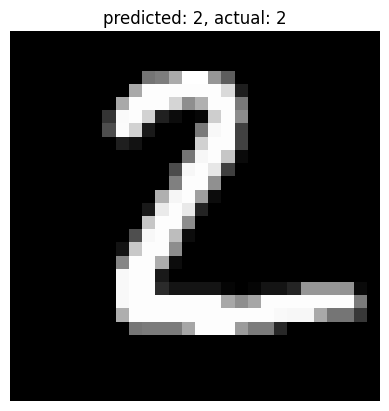

------------------------------------------------------------


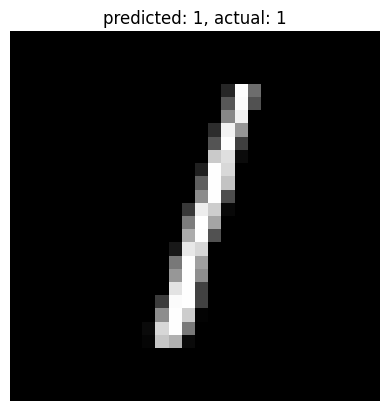

------------------------------------------------------------


In [44]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [45]:
y_train.shape

(55000,)

In [46]:
y_train[1]

3


y_train -

data_points | label
-|-
0|7
1|3

X_train

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


# Transfer learning

## New problem statement -
Classify handwritten digits into odd and even

In [47]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [48]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [51]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [52]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [56]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [57]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [59]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265802 (1.01 MB)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 265600 (1.01 MB)
_________________________________________________________________


In [60]:
100*2 + 2

202

In [69]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [65]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [66]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [67]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [68]:
np.unique(y_train_bin)

array([0, 1])

In [70]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [71]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1845 - accuracy: 0.9303 - val_loss: 0.1365 - val_accuracy: 0.9512
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1248 - accuracy: 0.9555 - val_loss: 0.1162 - val_accuracy: 0.9594
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1132 - accuracy: 0.9599 - val_loss: 0.1087 - val_accuracy: 0.9622
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9618 - val_loss: 0.1073 - val_accuracy: 0.9614
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9633 - val_loss: 0.1029 - val_accuracy: 0.9632
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1006 - accuracy: 0.9641 - val_loss: 0.0997 - val_accuracy: 0.9648
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.9650 - val_loss: 0.0987 - val_accuracy:

In [72]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9642


[0.10167879611253738, 0.9642000198364258]

In [73]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 47ms/step


array([[0.99 , 0.01 ],
       [0.001, 0.999],
       [0.97 , 0.03 ]], dtype=float32)

In [74]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [75]:
y_test_bin[:3]

array([0, 1, 0])

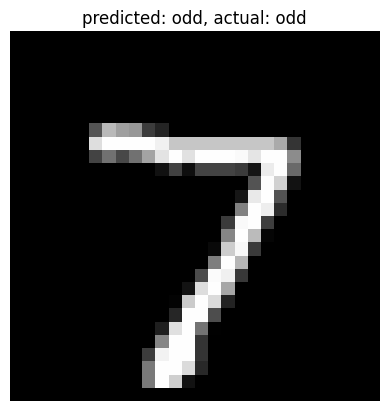

------------------------------------------------------------


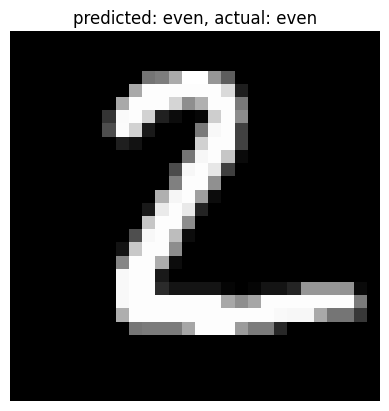

------------------------------------------------------------


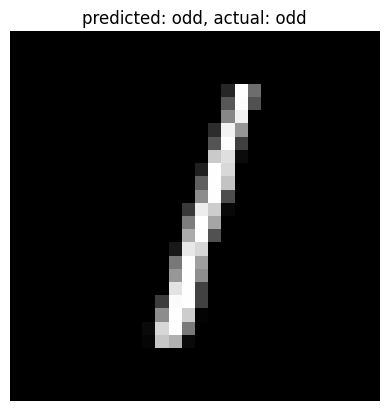

------------------------------------------------------------


In [76]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train A CNN model on MNIST data

In [91]:
X_train.shape

(55000, 28, 28)

In [92]:
X_train[0].shape

(28, 28)

In [93]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [94]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [95]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [96]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [97]:
np.expand_dims(X_train, 1).shape

(55000, 1, 28, 28)

In [98]:
np.expand_dims(X_train, 3).shape

(55000, 28, 28, 1)

In [84]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [85]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [99]:
#(55000, 28, 28, 1)
# 1 represents the single channel

In [86]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [87]:
X_train_CNN[0].shape

(28, 28, 1)

In [100]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [101]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [102]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [103]:
64*5*5

1600

In [104]:
(3*3*1 + 1) * 32

320

In [105]:
(28 - 3) // 1 + 1

26

In [106]:
(26 - 2) // 2 + 1

13

In [107]:
(3*3*32 + 1) * 64

18496

In [108]:
1600 * 10 + 10

16010

# Assignment =

1. Train this model (10 classes)
2. Try Transfer learning by changing the last layer to classify no. as even and odd (2 classes)

Mail your assignment at -
sunny@ineuron.ai

Subject Line of this email -

**[FSDS-Nov] CNN transfer learning Assignment**

In [ ]:
CNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=30,
    validation_data = (X_valid_CNN, y_valid)
)

In [ ]:
CNN_model.evaluate(X_test_CNN, y_test)

In [ ]:
CNN_model.save("CNN_model_full.h5")

In [ ]:
pre_trained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [ ]:
for layer in pre_trained_CNN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [ ]:
lower_pretrained_CNN_model = pre_trained_CNN_model.layers[:-1]

In [ ]:
new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [ ]:
new_CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [ ]:
new_CNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history = new_CNN_model.fit(
    X_train_CNN, y_train_bin, epochs=30,
    validation_data = (X_valid_CNN, y_valid_bin)
)

In [ ]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)